# TANZANIA CORONA  TWEETS EXPLORATORY ANALYSIS 

The purpose of this notebook is to understand what people have posted on twitter about corona virus (COVID-19) in Tanzania.

In [1]:
# IMPORT IMPORTANT PACKAGES 
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

from subprocess import check_output
from wordcloud import WordCloud # visualize most words used
from collections import  Counter
from bs4 import BeautifulSoup

from PIL import Image
import urllib
import requests
import scattertext as st  # draw scatter plot

# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer

import re #regular expression
from textblob import TextBlob
import string
import nltk


#Importing stopwords from nltk library
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize 
import spacy

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## LOAD TWITTER DATASET

The dataset was collocted from twiter by using  Web Scrapping methods from January to April 2020.

In [3]:
# load the dataset 
data = pd.read_csv("data/corona_tweets_TZ.csv")

In [4]:
# show sample data 
data.sample(10) 

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets
15,15,b'RT @MsumbaNews_: Mwonekano wa Chumba atakach...,1245633684692066304,140,2020-04-02 08:46:27,NaN,NaN,ht,Twitter Web App,0,4
1863,152,b'RT @zittokabwe: Ni muhimu sana wakati huu tu...,1246715216110501892,139,2020-04-05 08:24:05,NaN,NaN,in,Twitter for iPhone,0,16
449,24,b'RT @umwalimu: UPDATE: #COVID19Tanzania - 4 n...,1247204514937135109,139,2020-04-06 16:48:22,NaN,NaN,en,Twitter for Android,0,90
223,1,"b""You guys, self entrepreneurs, I know it's an...",1247175959322726405,273,2020-04-06 14:54:54,NaN,NaN,en,Twitter for Android,0,0
2734,21,b'RT @makene_tumaini: As we advance the fight ...,1247066746160283649,140,2020-04-06 07:40:56,NaN,NaN,en,Twitter for Android,0,18
833,456,b'RT @sikika1: #COVID19 updates as of 03 April...,1246104200259436544,108,2020-04-03 15:56:07,NaN,NaN,en,Twitter for Android,0,7
1758,37,b'RT @zittokabwe: Wananchi wa Zanzibar wakubal...,1247148010787745793,140,2020-04-06 13:03:51,NaN,NaN,in,Twitter for Android,0,13
2786,193,"b""The first time someone sent me this post it ...",1245942442274234368,285,2020-04-03 05:13:21,NaN,NaN,en,Twitter for Android,1,0
2847,483,b'RT @franklin_tissa: Sokoni Feri. Vita ya #CO...,1244712725202296834,92,2020-03-30 19:46:53,NaN,NaN,tl,Twitter for Android,0,16
287,65,b'RT @DocFaustine: Tanzania: Updated travel ad...,1246407945769955328,140,2020-04-04 12:03:06,NaN,NaN,en,Twitter for iPhone,0,44


In [5]:
# show columns 
data.columns 

Index(['Unnamed: 0', 'Tweets', 'id', 'lens', 'date', 'place', 'coordinateS',
       'lang', 'source', 'likes', 'retweets'],
      dtype='object')

In [6]:
#remove unnamed 0 column
data = data.drop("Unnamed: 0",axis=1)

In [7]:
#show columns again 
data.columns

Index(['Tweets', 'id', 'lens', 'date', 'place', 'coordinateS', 'lang',
       'source', 'likes', 'retweets'],
      dtype='object')

In [8]:
# check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweets       2874 non-null   object
 1   id           2874 non-null   int64 
 2   lens         2874 non-null   int64 
 3   date         2874 non-null   object
 4   place        36 non-null     object
 5   coordinateS  11 non-null     object
 6   lang         2874 non-null   object
 7   source       2874 non-null   object
 8   likes        2874 non-null   int64 
 9   retweets     2874 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 224.7+ KB


## CLEANING AND VISUALIZE DATASET 

In [9]:
#check missing values 
data.isnull().sum() 

Tweets            0
id                0
lens              0
date              0
place          2838
coordinateS    2863
lang              0
source            0
likes             0
retweets          0
dtype: int64

Variable places and coordinateS contain missing values

In [10]:
# remove columns place and coordinateS 
data = data.drop(["place","coordinateS"],axis=1)

In [11]:
# check missing values again 
data.isnull().sum()

Tweets      0
id          0
lens        0
date        0
lang        0
source      0
likes       0
retweets    0
dtype: int64

In [12]:
#check five rows 
data.tail()

,Tweets,id,lens,date,lang,source,likes,retweets
2869,b'#COVID19 #COVID19TZ #KnowTheFacts @wizara_af...,1244588426147627009,156,2020-03-30 11:32:58,in,Twitter for iPhone,0,0
2870,b'#coronavirus\n Global tour Just finished wit...,1244568103461228544,277,2020-03-30 10:12:13,en,Twitter for Android,0,0
2871,b'Dada zetu hivi huwa mna njaa au kuna minyoo....,1244499901087694850,273,2020-03-30 05:41:12,tl,Twitter for Android,0,0
2872,b'RT @umwalimu: Kazi iliyombele yetu ni kuondo...,1244494159517540353,140,2020-03-30 05:18:23,in,Twitter for Android,0,42
2873,b'RT @imungy: It shall be well again. Just bel...,1244482984553648129,139,2020-03-30 04:33:59,en,Twitter Web App,0,3


In [13]:
# check describe function for this dataset 
data.describe()

,id,lens,likes,retweets
count,2.874000e+03,2874.000000,2874.000000,2874.000000
mean,1.245719e+18,147.073069,6.240431,63.096381
std,7.797830e+14,44.682617,62.453193,72.020229
min,1.244455e+18,27.000000,0.000000,0.000000
25%,1.244967e+18,139.000000,0.000000,5.000000
50%,1.245699e+18,140.000000,0.000000,35.000000
75%,1.246319e+18,140.000000,0.000000,98.000000
max,1.247284e+18,389.000000,1677.000000,241.000000


In [14]:
# check tweets with max lens 
max_length_tweet = data[data.lens == 389]

In [15]:
# show the tweets content
max_length_tweet.Tweets.values

array(["b'@ViAgroforestry @ANSAFForum @mara_online @mbowethaddeus @shipella @agroforestrynw @tawiritz @MavunoAg @InadesFormation @EcoAgPartners Wakulima vijijini wanaweza kuathirika zaidi kwani wanategemea masoko ya wazi kuuza na kununua mazao mbalimbali #coronavoices #Tanzania #CoronaVirusTanzania #StaySafe #COVID19 #CoronaLessons #CoronaVirusUpdates #coronavirus #Farmers"],
      dtype=object)

In [16]:
# show max number of likes and retweets for the twets with max length 
print("number of likes: {}".format(int(max_length_tweet.likes)))
print("number of retweets: {}".format(int(max_length_tweet.retweets)))

number of likes: 3
number of retweets: 1


In [17]:
# check tweets with max likes 
max_likes_tweet = data[data.likes == 1677]

In [18]:
max_likes_tweet 

,Tweets,id,lens,date,lang,source,likes,retweets
2663,b'Ndugu Waziri @umwalimu naelewa magumu unayop...,1244881138210013186,304,2020-03-31 06:56:06,in,Twitter for iPhone,1677,108


In [20]:
# show the tweets content
max_likes_tweet.Tweets.values

array(["b'Ndugu Waziri @umwalimu naelewa magumu unayopitia wakati huu ukiwa mstari wa mbele kupambana na mlipuko huu wa #COVID19TZA hapa nchini. Uwazi kama huu utatusaidia sana kupambana na maradhi haya. Jitahidi sana KUTOFICHA maana haitusaidii. Huyu sio wa 2? Mola akupe nguvu na ujasiri"],
      dtype=object)

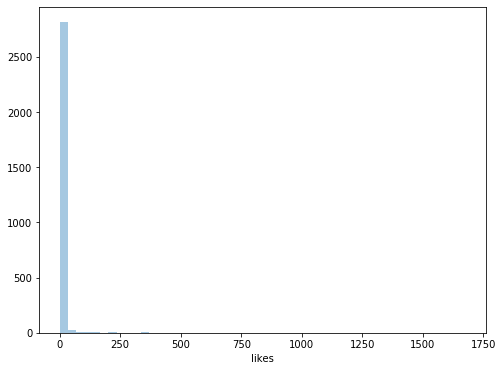

In [19]:
#plot the graph 
plt.figure(figsize=(8,6))
sns.distplot(data.likes,kde=False);

Most of the collected tweets have of 0 number of likes 

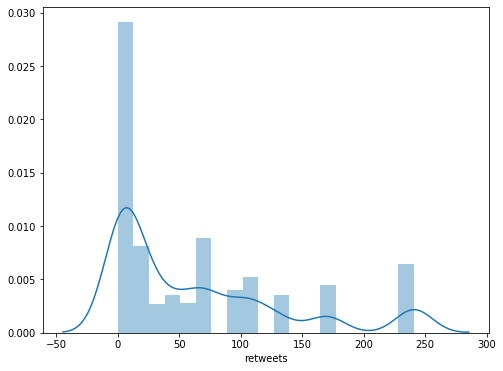

In [21]:
#plot the graph retweets variable
plt.figure(figsize=(8,6))
sns.distplot(data.retweets);

Most of the collected tweets have of 0 number of retweets

In [23]:
# check langauge used 
data.lang.value_counts()

in     1282
en     1239
tl      202
und      51
ht       45
fi       17
et       12
hi       11
da        7
ca        3
ro        2
it        2
es        1
Name: lang, dtype: int64

Twitter plaform does not identified swahili language

In [24]:
# replace other language with sw except for  english
data["lang"] = data.lang.replace(
    to_replace=[
        "in",
        "tl",
        "und",
        "ht",
        "fi",
        "et",
        "hi",
        "da",
        "ca",
        "it",
        "ro",
        "es",
    ],
    value="sw",
)

In [25]:
# check langauge used 
data.lang.value_counts()

sw    1635
en    1239
Name: lang, dtype: int64

We have more swahili tweets than english tweets

Text(0, 0.5, 'Total Number of Tweets')

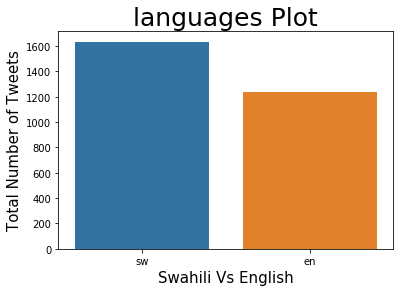

In [26]:
# check class distribution
sns.countplot(data=data, x="lang")
plt.title("languages Plot", fontsize=25)
plt.xlabel("Swahili Vs English", fontsize=15)
plt.ylabel("Total Number of Tweets", fontsize=15)

In [27]:
# show sample swahili tweets
data.Tweets[data.lang == "sw"].head() 

0    b'RT @Hakingowi: Waziri wa Afya, Maendeleo ya ...
1    b'@fikra_ya @ManenoIzaak Na tunawe kwa maji ti...
2    b'RT @Hakingowi: Waziri wa Afya, Maendeleo ya ...
3    b'Waziri wa Afya, Maendeleo ya Jamii, Jinsia, ...
4    b'Waziri wa Afya, Maendeleo ya Jamii, Jinsia, ...
Name: Tweets, dtype: object

In [28]:
# show sample english tweets
data.Tweets[data.lang == "en"].head() 

76     b'Making a Traditional #Tanzanian Mask for Pro...
99     b'JAM\xe2\x84\xa2 : STAY HOME !\n#lalabi #coro...
100    b'JAM\xe2\x84\xa2 : DEAR TIKTOK !\nWHY ARE AME...
101    b'Do your bit #covid2019, #COVID19 #COVIDpande...
106    b'JAM\xe2\x84\xa2 : BE SAFE &amp; PRAISE THE L...
Name: Tweets, dtype: object

In [29]:
# check Tweets Source 
data.source.value_counts()

Twitter for Android    1845
Twitter for iPhone      611
Twitter Web App         349
Twitter for iPad         29
Instagram                18
TweetDeck                 7
Hootsuite Inc.            5
Twitter Web Client        3
LinkedIn                  1
BotMinerodeMasas          1
TheMagaBat                1
KimAine222                1
Sprout Social             1
Mobile Web (M2)           1
Qureet Leads              1
Name: source, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

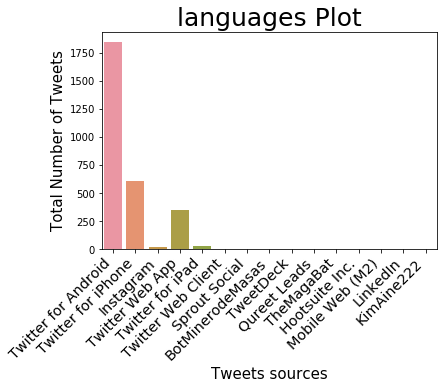

In [30]:
# check class distribution
sns.countplot(data=data, x="source")
plt.title("languages Plot", fontsize=25)
plt.xlabel("Tweets sources", fontsize=15)
plt.ylabel("Total Number of Tweets", fontsize=15)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Most of the tweets posted from Android Smart Phone

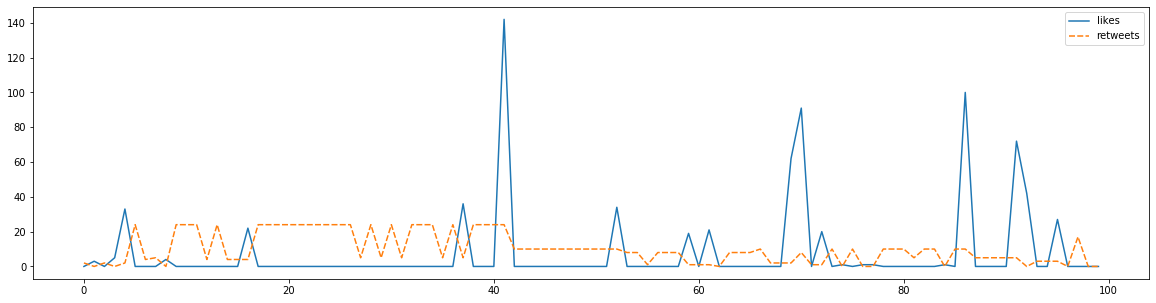

In [32]:
# plot likes and retweets for the first 100 tweets
likes_and_retweets = data[["likes","retweets"]][:100]
plt.figure(figsize=(20,5))
ax = sns.lineplot(data=likes_and_retweets)

Emojis are part of our life. Social media text has a lot of emojis. We need to remove the same in our text analysis

In [33]:
# Function to remove emoji.
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    
    return emoji_pattern.sub(r" ", string)


# passing the emoji function to 'text_rare'
data["tweets_processed"] = data["Tweets"].apply(remove_emoji)


In previous steps, we have removed emoji. Now, going to remove emoticons. What is the difference between emoji and emoticons? :-) is an emoticon and 😜 → emoji.

In [34]:
# Emoticons removal
import emo_unicode 
from emo_unicode import UNICODE_EMO, EMOTICONS

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u"(" + u"|".join(k for k in EMOTICONS) + u")")
    return emoticon_pattern.sub(r" ", text)


# applying remove_emoticons to 'tweets_processed'
data["tweets_processed"]= data["tweets_processed"].apply(remove_emoticons)

In [35]:
# Create a function to clean the tweets
def clean_text(text):
    text = re.sub('@[A-Za-z0–9]+', ' ', text) #Removing @mentions
    text = re.sub('#', ' ', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', ' ', text) # Removing RT
    text = re.sub('https?:\/\/\S+', ' ', text) # Removing hyperlink
    text  = re.sub('[^\w\s]',' ',text)  # remove punctuation 
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
    text = text.lower()  # set in lowercase  

    
    # stop-word removal
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    return text


data["tweets_processed"] = data["Tweets"].apply(clean_text)


In [36]:
# show first five rows after cleaning 
data["tweets_processed"].sample(5) 

494     b update covid19tanzania new positive cases in...
2280    b covid19tza tumetoa mapendekezo kwa serikali ...
726     b discussion regarding use integrated digital ...
1399    b taarifa za kuaminika zinasema weekend iliyop...
2823    b 3d printers innovators tanzania let help tac...
Name: tweets_processed, dtype: object

We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data

In [37]:
# Checking the first 30 most frequent words
from collections import Counter
cnt = Counter()
for text in data["tweets_processed"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(30)

[('b', 2875),
 ('n', 2381),
 ('xe2', 2260),
 ('x80', 2226),
 ('xa6', 2002),
 ('ya', 1340),
 ('na', 1322),
 ('wa', 1275),
 ('kwa', 781),
 ('covid19tza', 691),
 ('huu', 537),
 ('covid19', 510),
 ('covid19tz', 473),
 ('covid', 446),
 ('covid19tanzania', 413),
 ('x9f', 387),
 ('xf0', 385),
 ('mtu', 382),
 ('tanzania', 343),
 ('stats', 293),
 ('glance', 293),
 ('corona', 292),
 ('za', 285),
 ('cases', 284),
 ('years', 251),
 ('vya', 245),
 ('ni', 239),
 ('coronvirustanzania', 237),
 ('kuhusu', 236),
 ('virusi', 226)]

In [38]:
# list of common words that have common meaning
words_to_remove = [
    "la",
    "ni",
    "kuhusu",
    "new",
    "kama",
    "brt",
    "na",
    "ya",
    "wa",
    "covid19",
    "covid19tza",
    "covid19tz",
    "kwa",
    "huu",
    "mtu",
    "tanzania",
    "za",
    "corona",
    "vya",
    "coronvirustanzania",
    "covid19tanzania",
    "stats",
    "years",
    "b",
    "n",
    "xe2",
    "x80",
    "xa6",
    "1",
    "hao",
    "ili",
    "kati",
    "xf0",
    "x9f",
    "x99",
    "x8c",
    "x10",
    "katika",
    "othe",
    "po",
    "x8f",
    "xbd",
    "huu",
]

# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not in words_to_remove])


# Passing the function freqwords
data["tweets_processed"] = data["tweets_processed"].apply(freqwords)

Another common preprocessing technique is removing HTML tags. HTML tags usually presented in scraping data.

In [39]:
#Function for removing html
def remove_html(text):
    return BeautifulSoup(text, "lxml").text

# Passing the function to 'text_rare'
data["tweets_processed"]  = data["tweets_processed"].apply(remove_html)

In [40]:
# show first five rows after cleaning 
data["tweets_processed"].sample(5) 

1333    deep sympathy announce first death resulted ta...
710     _afyatz idc platform able support number key f...
2624    watanzania wenzangu nchi yetu imepoteza raia w...
2371    mbunge jimbo kawe ambaye pia mjumbe kamati kuu...
958     umbali mita ndio naamini mfano wananchi wengi ...
Name: tweets_processed, dtype: object

Lemmatization is the process of converting a word to its base form.lemmatization considers the context and converts the word to its meaningful base form.We need to provide the POS tag of the word along with the word for lemmatizer in NLTK. Depending on the POS, the lemmatizer may return different results.

In [41]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# lemmitization
lemmatizer = WordNetLemmatizer()

wordnet_map = {
    "N": wordnet.NOUN,
    "V": wordnet.VERB,
    "J": wordnet.ADJ,
    "R": wordnet.ADV,
}  # Pos tag, used Noun, Verb, Adjective and Adverb

# Function for lemmatization using POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join(
        [
            lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN))
            for word, pos in pos_tagged_text
        ]
    )


# Passing the function for english tweets only
data.tweets_processed[data.lang == "en"] = data.tweets_processed[
    data.lang == "en"
].apply(lemmatize_words)

# WORD COUNT 

In [43]:
# function to count number of words and create an image 
def word_count_plot(data,name):
    mpl.rcParams['figure.figsize']=(16.0,10.0)    

    text = " ".join(tweet for tweet in data)
    print ("There are {} words in the combination of all {}.".format(len(text),name))

    wordcloud = WordCloud(
 
                              max_words=100,
                              max_font_size=20, 
                              random_state=42
                             ).generate(str(text))

    print(wordcloud)
    fig = plt.figure(1)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    fig.savefig("images/{}.png".format(name))

There are 78912 words in the combination of all english_tweets.


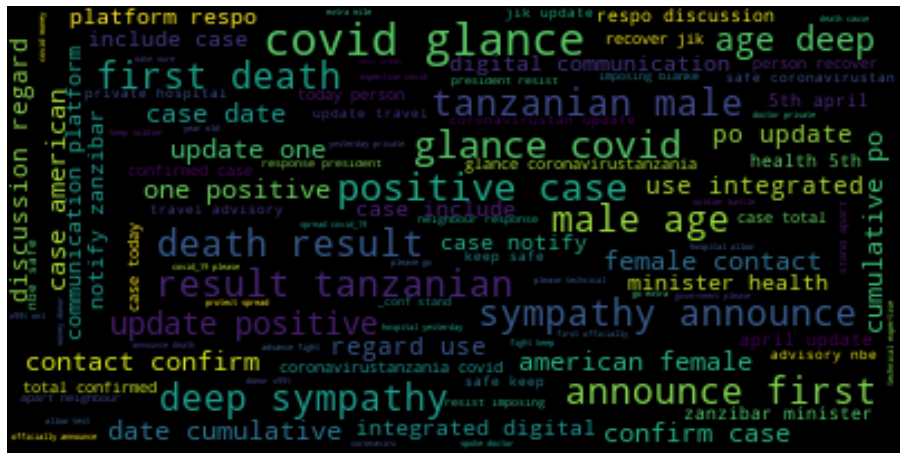

In [44]:
#for all english tweets 
word_count_plot(data.tweets_processed[data.lang == "en"],"english_tweets")

There are 163989 words in the combination of all swahili_tweets.


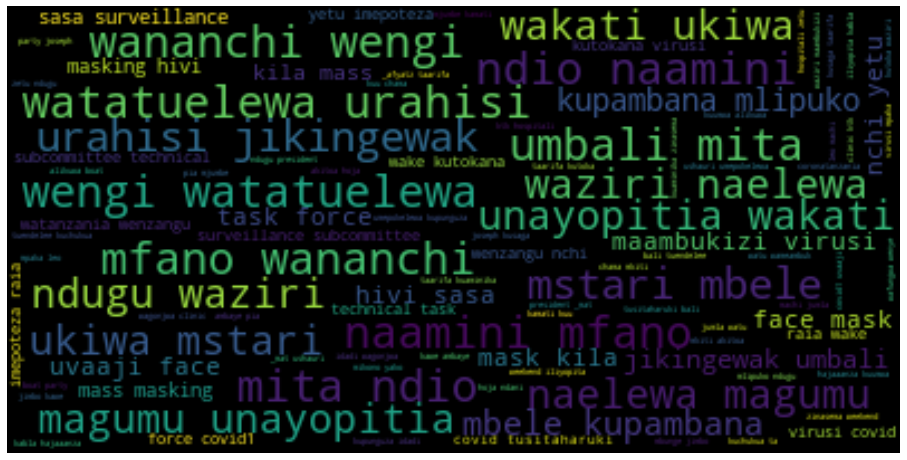

In [45]:
#for all english tweets 
word_count_plot(data.tweets_processed[data.lang == "sw"],"swahili_tweets")

In [46]:
# top 20 words 

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer,title):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    plt.figure(figsize=(16, 10))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title(title)
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')


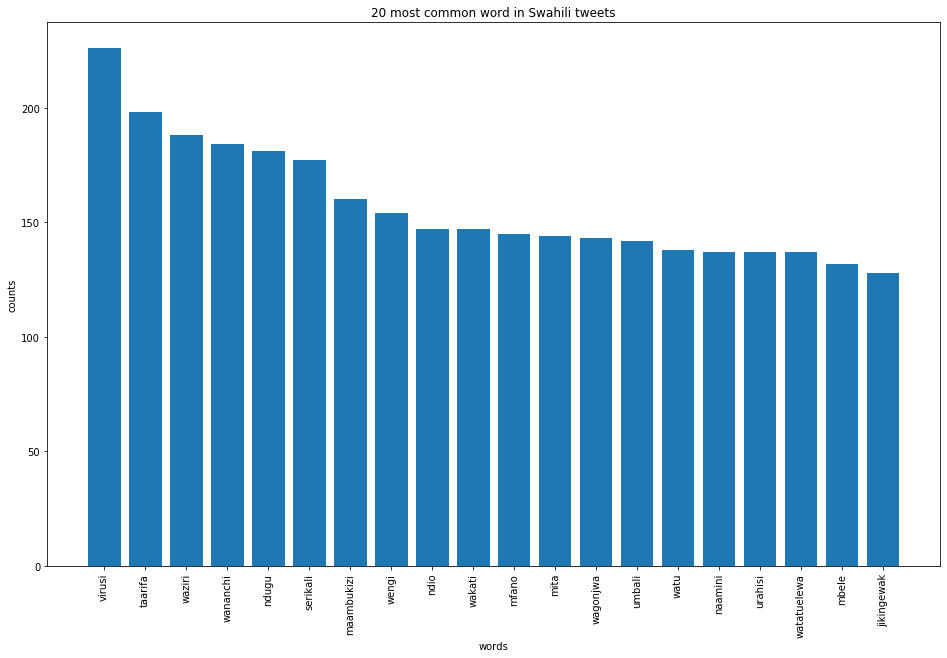

In [47]:
# Fit and transform the processed tweets for swahili only
count_data = count_vectorizer.fit_transform(data.tweets_processed[data.lang == "sw"])

# Visualise the 20 most common words
plot_20_most_common_words(
    count_data, count_vectorizer, title="20 most common word in Swahili tweets"
)

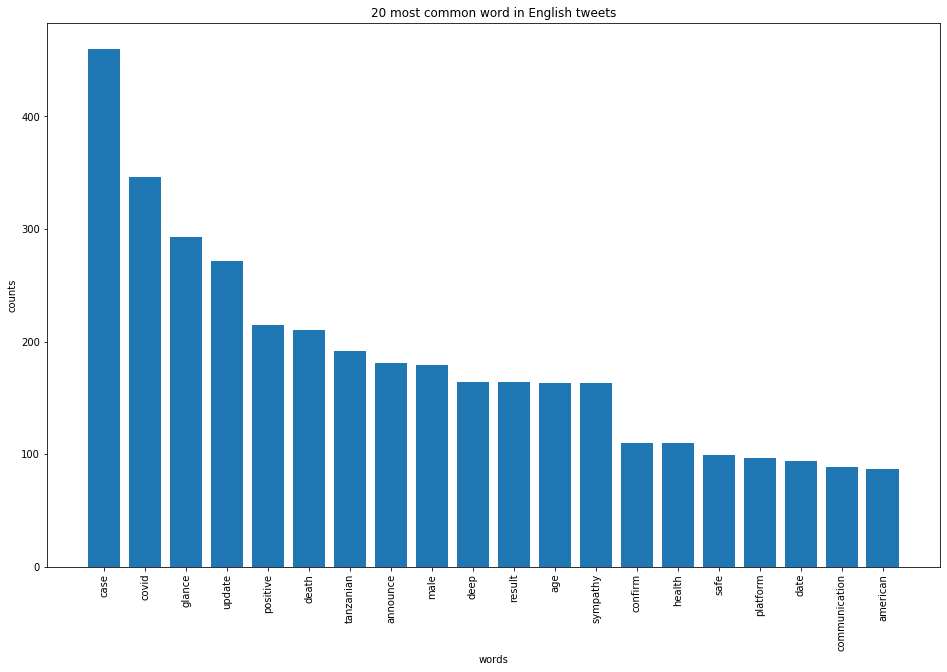

In [48]:
# Fit and transform the processed tweets for swahili only
count_data = count_vectorizer.fit_transform(data.tweets_processed[data.lang == "en"])

# Visualise the 20 most common words
plot_20_most_common_words(
    count_data, count_vectorizer, title="20 most common word in English tweets"
)

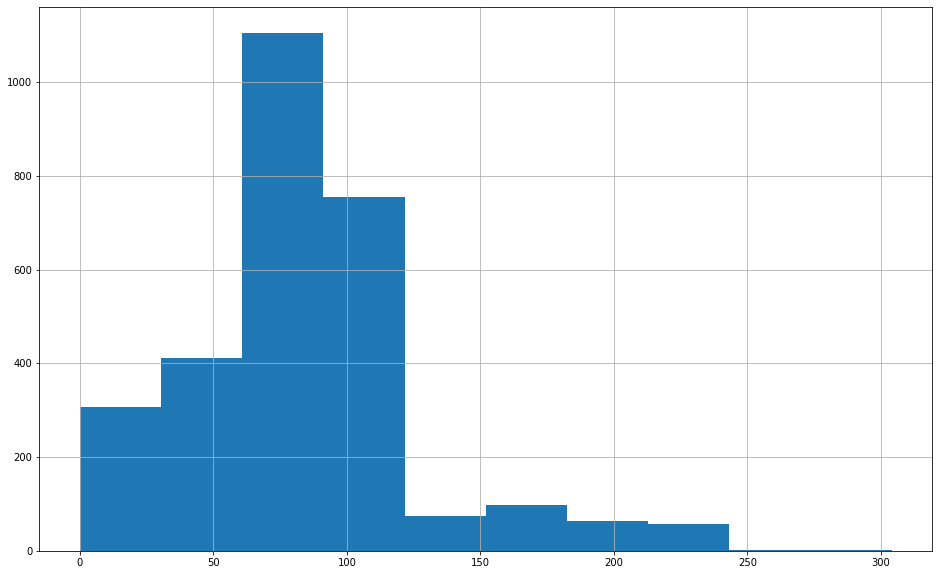

In [49]:
# the number of characters present in each sentence.

# Code Snippet for Character Length Histogram

def plot_character_length_histogram(text):
    text.str.len().hist()

plot_character_length_histogram(data['tweets_processed'])    

most of the tweets have total number of characters around 60 characters to 140 characters.

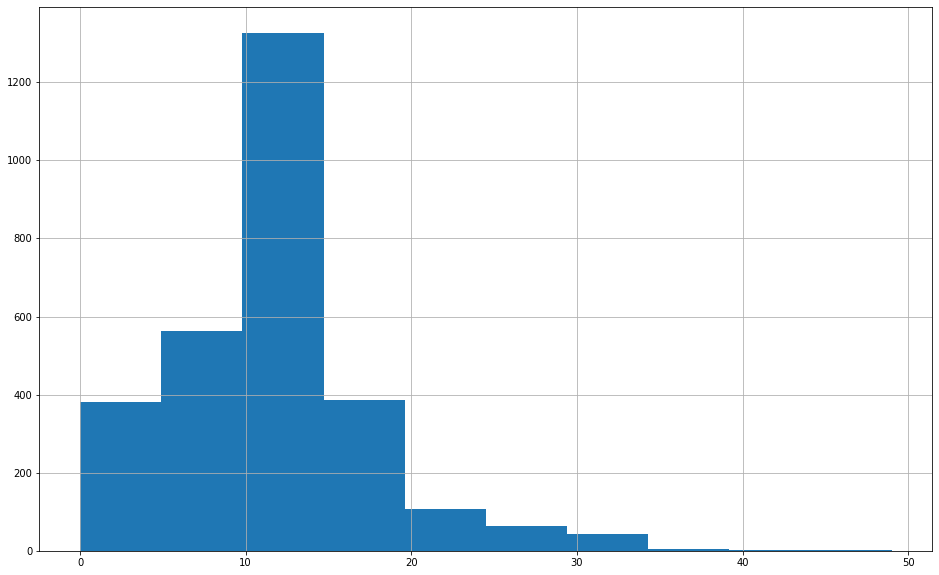

In [50]:
# data exploration at a word-level. Let’s plot the number of words appearing in each tweet

# Code Snippet for Word Number Histogram

def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    
plot_word_number_histogram(data['tweets_processed'])

Most tweets have total number of words from 10 to 20 words

In [51]:
# Ngram exploration

"""
Ngrams are simply contiguous sequences of n words. For example “riverbank”,” 
The three musketeers” etc.
"""


def get_top_ngram(data, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(data)
    bag_of_words = vec.transform(data)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]


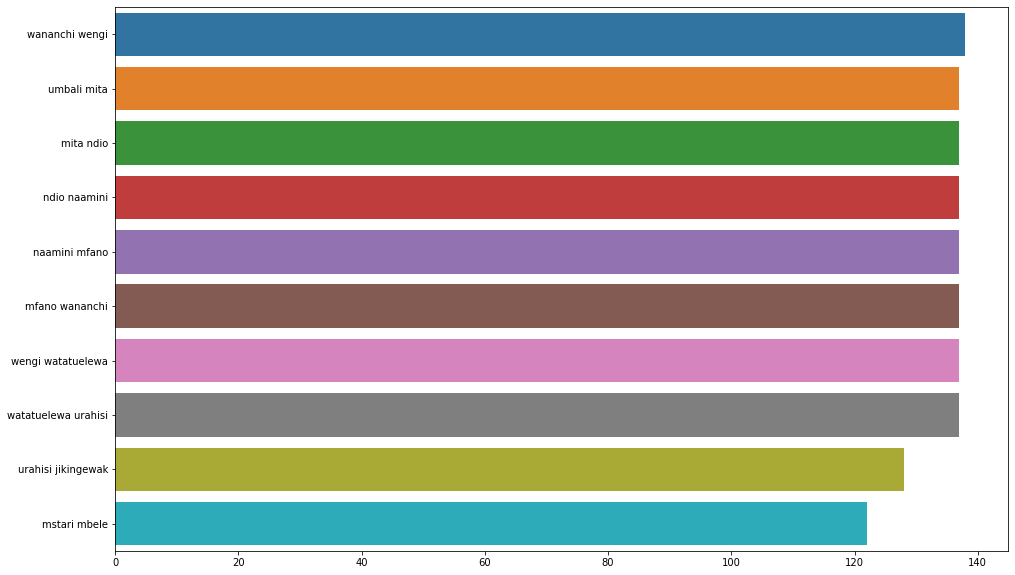

In [55]:
# ngram exploration for swahili tweets
top_n_bigrams = get_top_ngram(data.tweets_processed[data.lang == "sw"], 2)[:10]
x, y = map(list, zip(*top_n_bigrams))
sns.barplot(x=y, y=x)

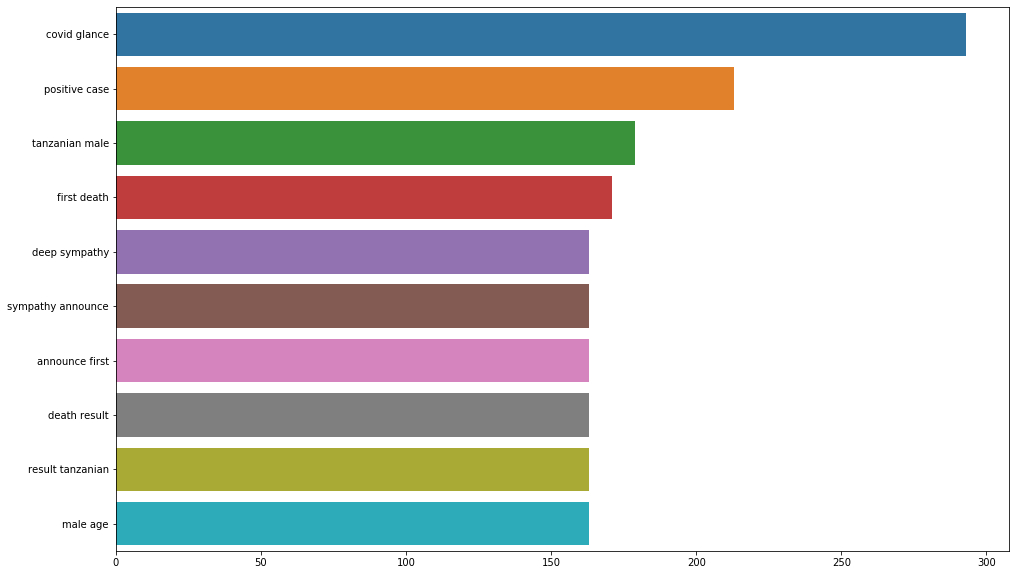

In [56]:
# ngram exploration for english tweets
top_n_bigrams = get_top_ngram(data.tweets_processed[data.lang == "en"], 2)[:10]
x, y = map(list, zip(*top_n_bigrams))
sns.barplot(x=y, y=x)

# Resources 

- [Text preprocessing for data scientist](https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d)
- [Analyze Bill Gates tweets](https://towardsdatascience.com/fun-with-analyzing-billgates-tweets-twitter-apis-step-by-step-analysis-11d9c0448110)
- [Text EDA for NLP](https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571)
- [Twitter Sentiment Analysis](https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082)